In [25]:
import time
import odrive
from odrive.enums import *

print("Finding odrv...")
odrv0 = odrive.find_any()

# print(INPUT_MODE_POS_FILTER) # 3
# print(INPUT_MODE_TRAP_TRAJ) # 5
# print(CONTROL_MODE_VELOCITY_CONTROL) # 2
# print(INPUT_MODE_VEL_RAMP) # 2 
# print(CONTROL_MODE_TORQUE_CONTROL) # 1

Finding odrv...


In [24]:
import time
def idle():
    time.sleep(0.5)
    odrv0.axis1.requested_state = AXIS_STATE_IDLE
    time.sleep(0.5)
idle()

In [26]:
def calib():
    # Calibrate motor and wait for it to finish
    print("starting calibration...")
    time.sleep(2)
    odrv0.axis1.requested_state = AXIS_STATE_FULL_CALIBRATION_SEQUENCE
    while odrv0.axis1.current_state != AXIS_STATE_IDLE:
        time.sleep(1)

    print("setting other params...")
    odrv0.axis1.encoder.set_linear_count(0)
    odrv0.axis1.requested_state = AXIS_STATE_CLOSED_LOOP_CONTROL
calib()

starting calibration...
setting other params...


In [23]:
def lifting():
    odrv0.axis1.controller.config.control_mode = CONTROL_MODE_POSITION_CONTROL
    odrv0.axis1.controller.config.input_mode = INPUT_MODE_TRAP_TRAJ 
    odrv0.axis1.controller.move_incremental(-2, True)
    time.sleep(5)
    odrv0.axis1.controller.move_incremental(2, True)
lifting()

5
3


/home/stevex/Desktop/odrv-test/env/lib/python3.10/site-packages/odrive/utils.py:323: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  _ = animation.FuncAnimation(fig, animate, interval=plot_rate)


KeyboardInterrupt: 

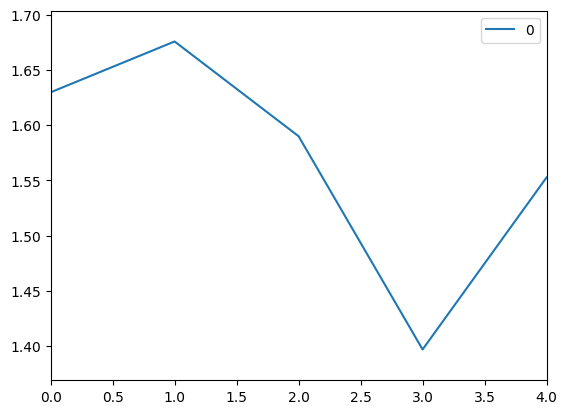

In [4]:
def monitor():
    print(odrv0.axis1.controller.config.input_mode)
    print(odrv0.axis1.controller.config.control_mode)

    import matplotlib.pyplot as plt
    from odrive.utils import start_liveplotter
    avg_I = 0
    start_liveplotter(lambda: [odrv0.axis1.motor.current_control.Iq_measured])
    time.sleep(100000)
    # avg_I += odrv0.axis1.motor.current_control.Iq_measured
    # print("Average I: ", avg_I)
    plt.close('all')
monitor()

In [29]:
def turn_motor_short(time_duration=5, direction="ccw"):
    odrv0.axis1.controller.config.input_mode = INPUT_MODE_PASSTHROUGH
    odrv0.axis1.controller.config.control_mode = CONTROL_MODE_VELOCITY_CONTROL
    multiplier = 1
    if direction == "cw":
        multiplier *= -1 
    input_velocity = multiplier * 4 # (n / 10) turns / second(in terms of actuator's output)
    turn_period = time_duration # in terms of seconds

    odrv0.axis1.controller.input_vel = 0
    time.sleep(1)
    odrv0.axis1.controller.input_vel = input_velocity
    print(odrv0.axis1.controller.vel_setpoint)
    # print(odrv0.axis1.encoder.pos_estimate)
    time.sleep(turn_period) # allowed to rotate for this .sleep(x) amount of time at above's input velocity
    odrv0.axis1.controller.input_vel = 0
    return True
turn_motor_short(direction="ccw")

4.0


True